In [53]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns


In [54]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
    

In [55]:
def get_data():
    X = pd.DataFrame(load_iris().data,columns = load_iris().feature_names).values
    Y = load_iris().target
    Y = Y.reshape(Y.shape[0],1)
    x = np.ones((X.shape[0],1))
    X = np.insert(X,0,x,1)
    return X,Y
    

In [56]:
def init_params(X):
    return np.zeros((X.shape[1],1))

In [57]:
def get_Y_pred(params,X):
    return sigmoid(X@params)

In [58]:
def cross_entrophy_cost(Y_pred,Y):
    return (-(1-Y)*np.log(1-Y_pred)-(Y)*np.log(Y_pred)).sum()
    

In [59]:
def grad_descent(X,Y,params,learnin_rate,num_itr):
    m = X.shape[0]
    J_hist = np.zeros((num_itr,1))
    for i in range(num_itr):
        Y_pred = get_Y_pred(params,X)
        params = params - (learnin_rate/m)*X.T@(Y_pred - Y)
        J_hist[i] = cross_entrophy_cost(Y_pred,Y)
    plt.plot(range(len(J_hist)),J_hist,'r')
    plt.xlabel('num_iterations')
    plt.ylabel('cost')
    plt.show()
    return params

        
    

In [60]:
X,Y = get_data()

In [61]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [62]:
Y_train_0 = (Y_train==0).astype(int)
Y_train_1 = (Y_train==1).astype(int)
Y_train_2 = (Y_train==2).astype(int)

In [63]:
params_0 = init_params(X_train)
params_1 = init_params(X_train)
params_2 = init_params(X_train)


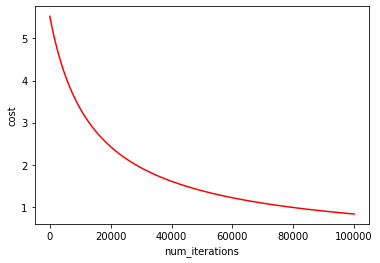

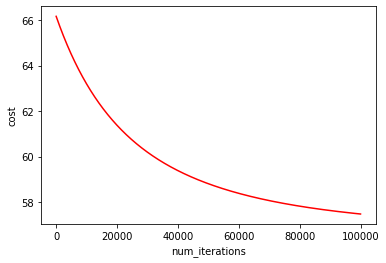

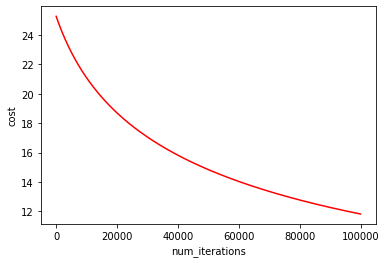

In [66]:
params_0 = grad_descent(X_train,Y_train_0,params_0,0.0009,100000)
params_1 = grad_descent(X_train,Y_train_1,params_1,0.0009,100000)
params_2 = grad_descent(X_train,Y_train_2,params_2,0.0009,100000)


In [67]:
Y_pred_0 = get_Y_pred(params_0,X_train)
Y_pred_1 = get_Y_pred(params_1,X_train)
Y_pred_2 = get_Y_pred(params_2,X_train)

In [71]:
Y_pred_final = np.zeros((Y_train.shape[0],1))
for i in range(Y_train.shape[0]):
    if Y_pred_0[i] > Y_pred_1[i]:
        if Y_pred_0[i]<Y_pred_2[i]:
            Y_pred_final[i]=2
        else:
            Y_pred_final[i]=0
    else:
        if Y_pred_1[i]> Y_pred_2[i]:
            Y_pred_final[i]=1
        else:
            Y_pred_final[i]=2

In [74]:
(Y_pred_final==Y_train).astype(int).sum()/Y_train.shape[0]


0.95